# Les librairies

In [2]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

Chargement des données

In [85]:
data = pd.read_csv("../Data/Data_vi_marketing_campaigns.csv")
data.head(2)

,Education,Marital_Status,Income,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,NumStorePurchases,NumWebVisitsMonth,Complain,Response,Is_parent,Household,Age,Seniority,Total_Spent,Total_Accepted_Campaigns
0,Graduation,Single,58138.0,58,635,88,546,172,88,88,...,4,7,0,1,Not Parent,1,57,2,1617,0
1,Graduation,Single,46344.0,38,11,1,6,2,1,6,...,2,5,0,0,Parent,3,60,0,27,0


L'objectif de ce notebook est de réaliser une **analyse exploratoire des données client** afin de mieux comprendre leurs caractéristiques et comportements.  Cette analyse sera structurée en deux parties principales :

- Profil sociodémographique des clients
- Comportement d'achat des clients

L'analyse graphique nous aidera à visualiser ces informations et à découvrir des schémas sous-jacents, facilitant ainsi la segmentation client et l'optimisation des actions commerciales.


# 1. Profil sociodémographique des clients.

## 1.1. Age des clients

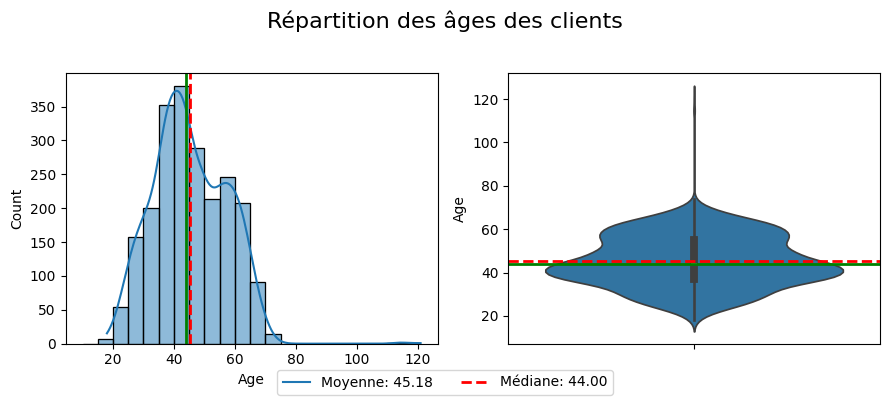

In [4]:
bins = np.arange(10, data.Age.max(), 5) 
mean_age, median_age = data.Age.mean(), data.Age.median()

fig, axes = plt.subplots(1, 2, figsize=(9, 4))

sns.histplot(data=data, x="Age", kde=True, bins=bins, ax=axes[0])
axes[0].axvline(mean_age, color='r', linestyle='--', linewidth=2)
axes[0].axvline(median_age, color='g', linestyle='-', linewidth=2)

sns.violinplot(data=data, y="Age", ax=axes[1])
axes[1].axhline(mean_age, color='r', linestyle='--', linewidth=2)
axes[1].axhline(median_age, color='g', linestyle='-', linewidth=2)

plt.suptitle('Répartition des âges des clients', fontsize=16)
fig.legend([f'Moyenne: {mean_age:.2f}', f'Médiane: {median_age:.2f}'], loc='lower center', bbox_to_anchor=(0.5, 0), ncol=2)
plt.tight_layout(rect=[0, 0, 1, 0.95]) 

plt.show()
del mean_age, median_age

Les clients sont en moyenne agés de 45 ans. On remarque cependant que très peu de clients ont plus de 75 ans.

In [130]:
print(f"""Il y a {(data.Age > 75).sum()} clients qui ont plus de 75 ans et les âges calculés sont {",".join(data[data.Age > 75]["Age"].astype(str))}.""")

Il y a 3 clients qui ont plus de 75 ans et les âges calculés sont 114,121,115.


> Ces valeurs extrêmes soulèvent des doutes quant à leur validité, suggérant qu'elles pourraient être le résultat d'erreurs dans les données. Afin d'écarter tout doute, le choix est fait de les supprimer.

In [5]:
data = data[~(data.Age > 75)]
data.shape

(2213, 23)

## 1.2. Niveau d'étude des clients et leurs revenus

### 1.2.1. Niveau d'étude des clients

In [6]:
def add_annotation(ax, data):
    for p in ax.patches:
        height = p.get_height()
        ax.annotate(f'{int(height)} ({height/len(data):.1%})', 
                    (p.get_x() + p.get_width() / 2., height), 
                    ha='center', va='bottom', fontsize=10)

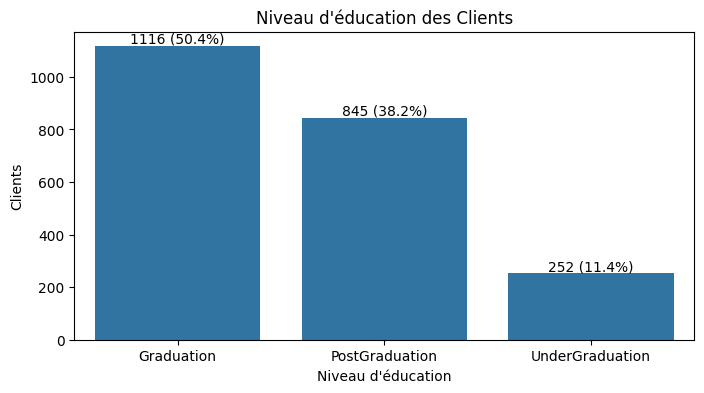

In [7]:
plt.figure(figsize=(8, 4))
ax = sns.countplot(data=data, x="Education")
add_annotation(ax, data)
plt.title("Niveau d'éducation des Clients")
plt.xlabel("Niveau d'éducation")
plt.ylabel("Clients")
plt.show()

> La majorité des clients ont le niveau `graduation` (1116, 50.4 % du total). Le niveau d'étude `Post-graduation` - regroupant ceux qui ont eu un master et ceux qui sont PhD - suit avec **845 clients** (38.2 %). Les clients avec un niveau `Undergraduation` sont au nombre de **252** (11.5 %) et sont relativement sous-représentés.


### 1.2.2. Répartition des revenus des clients

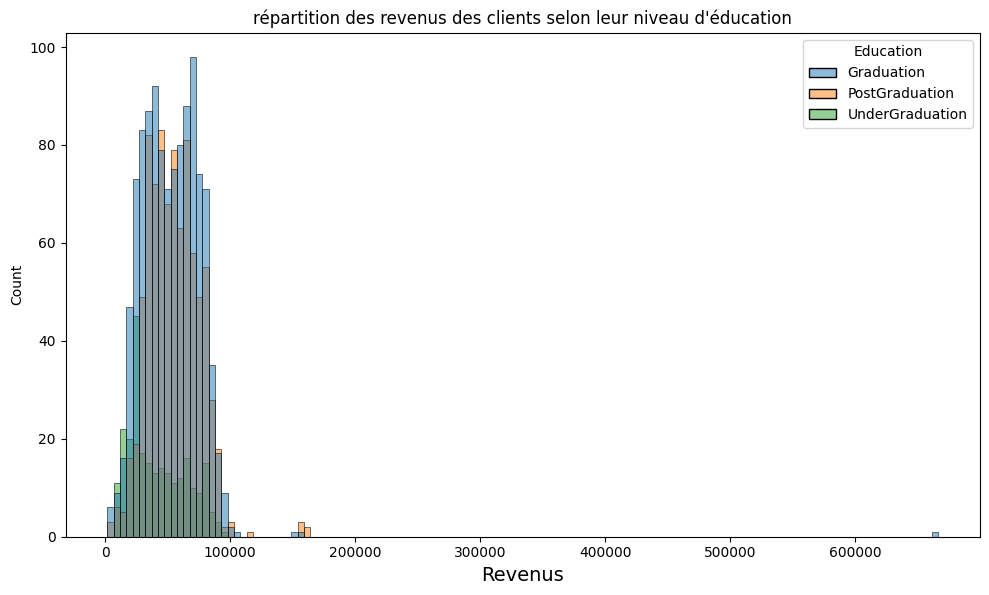

In [ ]:
plt.figure(figsize=(10, 6)) 
sns.histplot(x=data['Income'], data=data, hue = 'Education')
plt.title("répartition des revenus des clients selon leur niveau d'éducation")
plt.tight_layout()
plt.xlabel("Revenus", fontsize=14)
plt.show()

### 1.3. Situation familiale des clients

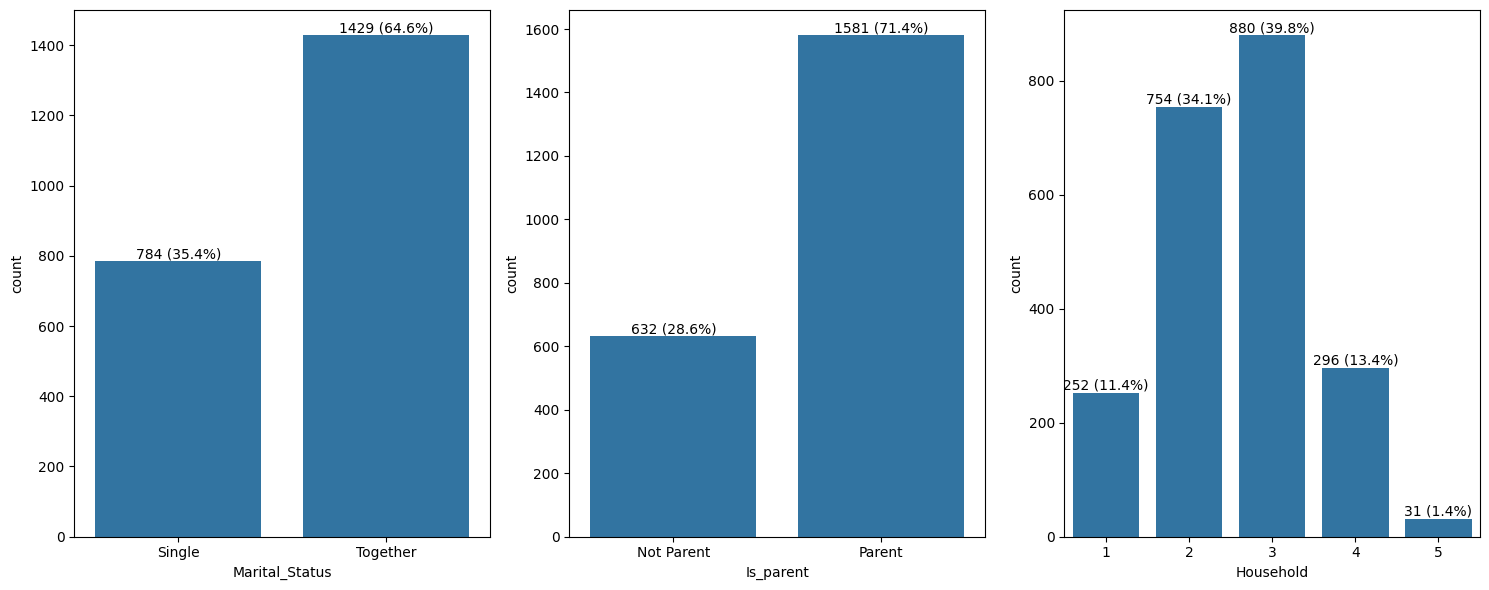

In [161]:
fig, axes = plt.subplots(1, 3, figsize=(15, 6))
plt.subplot(1, 3, 1)
ax = sns.countplot(data=data, x="Marital_Status")
add_annotation(ax, data)
plt.subplot(1, 3, 2)
ax = sns.countplot(data=data, x="Is_parent")
add_annotation(ax, data)
plt.subplot(1, 3, 3)
ax = sns.countplot(data=data, x="Household")
add_annotation(ax, data)
plt.tight_layout()

64.6% des clients sont en couple contre 35,4 % pour les personnes célibataires.
71,4% des clients ont au moins un enfant contre 28,6  % pour les clients qui n'en ont pas

### 1.4. Distribution de l’ancienneté des clients (à partir de Dt_Customer)

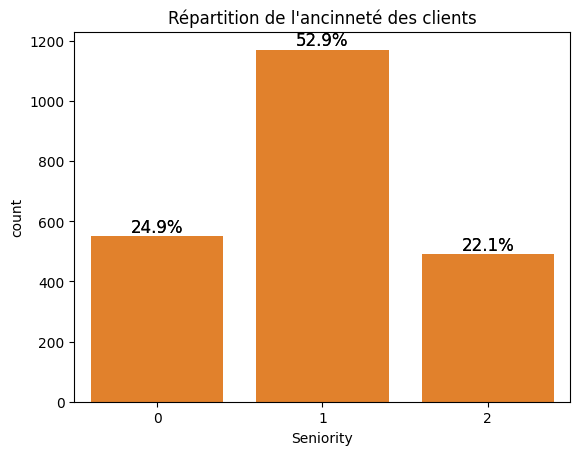

In [37]:
ax = sns.countplot(x=data['Seniority'], data=data)
sns.countplot(x=data['Seniority'], data=data)
plt.title("Répartition de l'ancinneté des clients")
total = len(data)
for p in ax.patches:
    height = p.get_height()
    percentage = f'{100 * height / total:.1f}%' 
    ax.annotate(percentage,
    (p.get_x() + p.get_width() / 2., height),
    ha='center', va='bottom', 
    fontsize=12, color='black')
plt.show()

La majorité des clients soit, 52.9% des clients ont 1 an d'ancienneté. 24,9% ont été inscrit en 2012, et 22,1% ont 2 ans d'ancinneté.

## 2.  Comportement des clients (Interactions et habitudes d'achat)

### 2.1. Dépenses totales par catégorie de produit (vin, fruits, viande, poisson, sucreries, or)

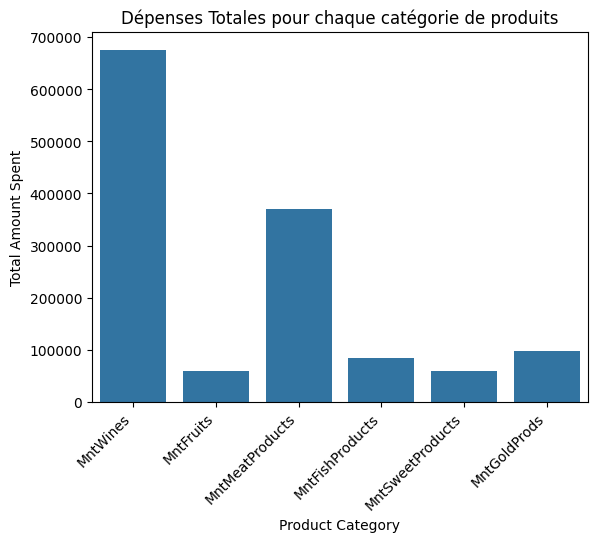

In [157]:
total_spent = []
vars = ["MntWines", "MntFruits", "MntMeatProducts", "MntFishProducts", "MntSweetProducts", "MntGoldProds"]
for var in vars:
    total_spent.append(data[var].sum())
sns.barplot(x=vars, y=total_spent)
plt.title("Dépenses Totales pour chaque catégorie de produits")
plt.xlabel("Product Category")
plt.ylabel("Total Amount Spent")
plt.xticks(rotation=45, ha="right")
plt.show()


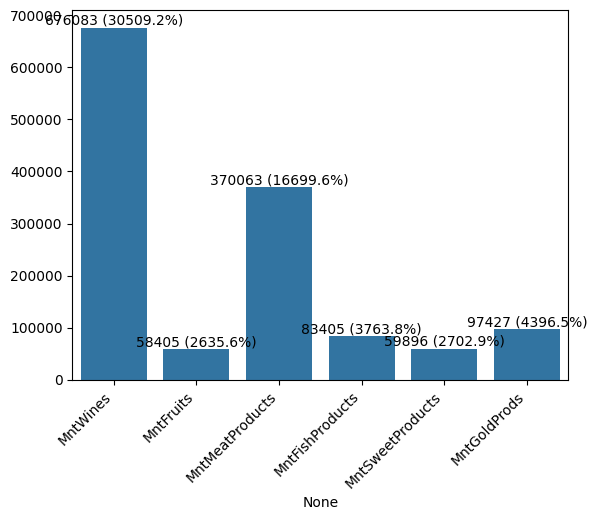

In [158]:
ax = sns.barplot(x = data[vars].sum().index, y=data[vars].sum().values)
add_annotation(ax, data)
plt.xticks(rotation=45, ha='right')
plt.show()

Les clients ont dépensé majoritairement en achat de vin, moyennement en achat de viande et très faiblement en achat de fruits.

### 2.2. Répartition des clients par nombre d'achats effectué suite à:
       - Réductions sur les achats (NumDealsPurchases)
       - Achats en ligne (NumWebPurchases)
       - Catalogue (NumCatalogPurchases)
       - Magasins (NumStorePurchases)
       - Visites sur le site web (NumWebVisitsMonth)

NumDealsPurchases


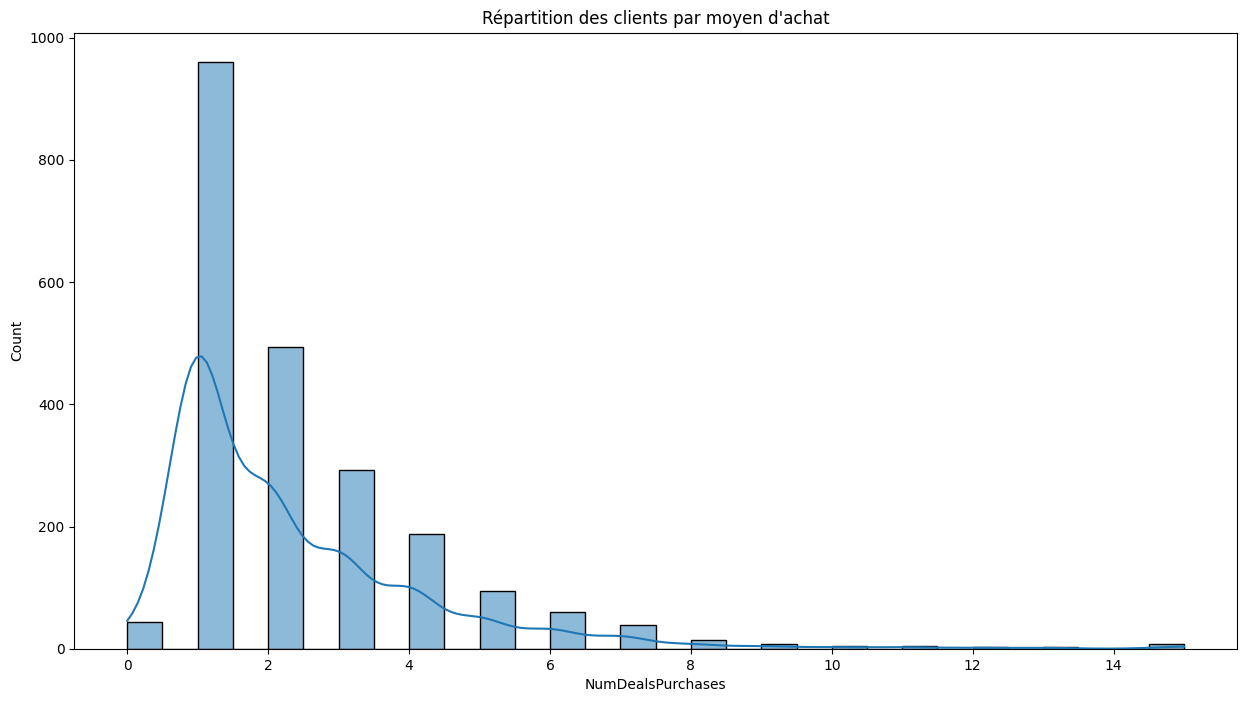

NumWebPurchases


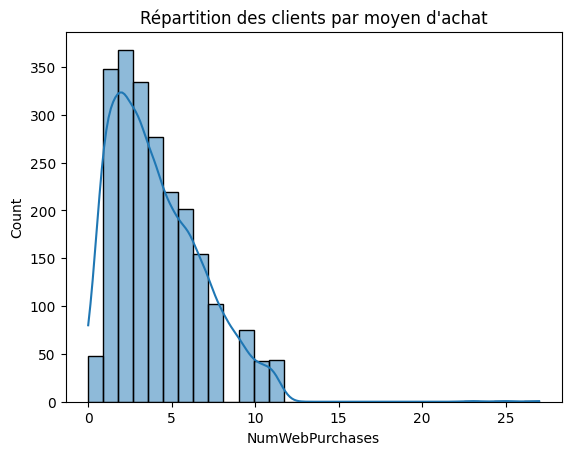

NumCatalogPurchases


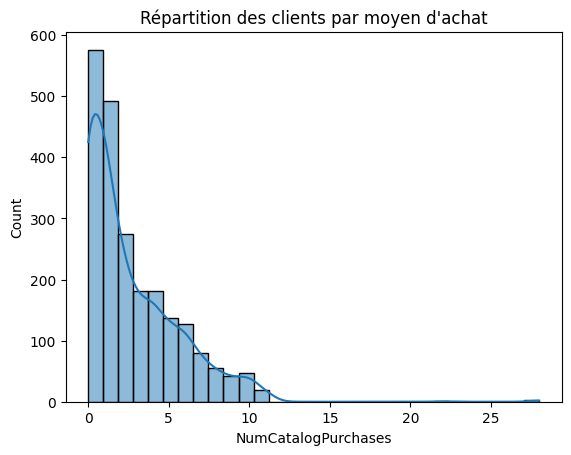

NumStorePurchases


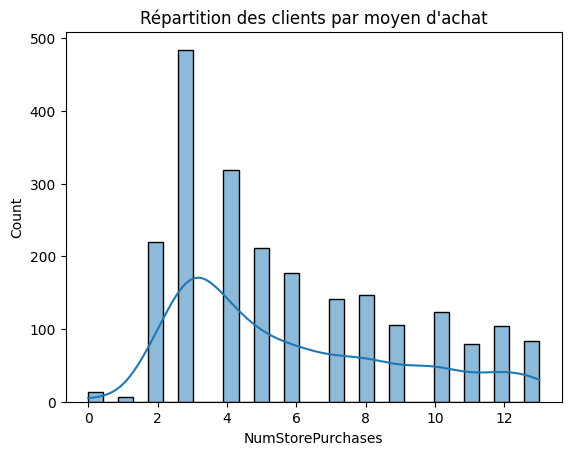

NumWebVisitsMonth


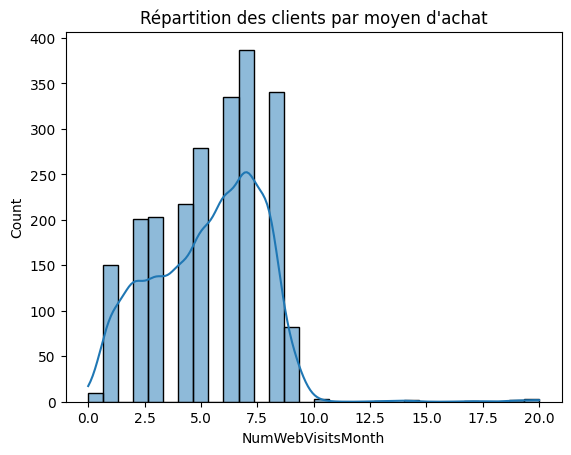

In [131]:
plt.figure(figsize=(15, 8))
vars = ['NumDealsPurchases','NumWebPurchases','NumCatalogPurchases', 'NumStorePurchases','NumWebVisitsMonth']
for i, var in enumerate (vars):
    sns.histplot(data[var], bins=30, kde=True)  
    plt.title("Répartition des clients par moyen d'achat")
    print(var)
    plt.show()

La plupart des clients ont au moins une fois effectué un achat suite à une réduction. 

### 3. Dépenses totales des clients ayant accepté des campagnes marketing (Total_Accepted_Campaigns)

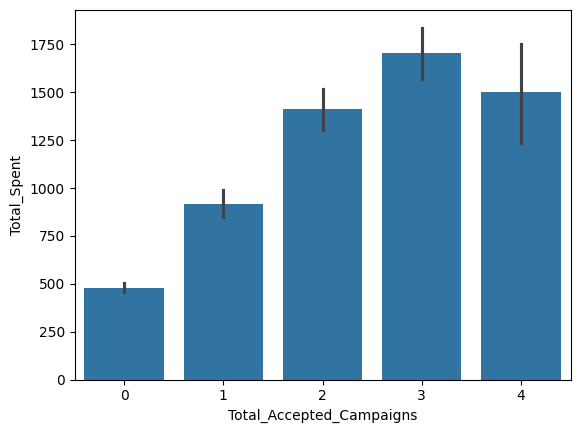

In [147]:
sns.barplot(y=data['Total_Spent'], x=data['Total_Accepted_Campaigns'])
plt.show()

In [138]:
if (data['Total_Accepted_Campaigns'] != "0").any():  # Vérifie si au moins une valeur n'est pas "0"
    print(data['Total_Spent'].sum())

1345279
